# Linear Regression Example, HDB Prices Estimation ...
### Amir, 2025, NUS SoC ACE

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
# from google.colab import drive

# drive.mount('/content/drive')

# Load the dataset
file_path = "sample_data/resale-sample.csv"

In [2]:
dataset = pd.read_csv(file_path)

In [3]:
dataset.shape

(2000, 11)

In [4]:
dataset.describe()

,Unnamed: 0,floor_area_sqm,lease_commence_date,resale_price
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,50160.695000,97.389250,1990.445500,453921.532940
std,28817.097081,24.387528,10.581352,129727.518779
min,24.000000,34.000000,1967.000000,210000.000000
25%,24862.750000,76.000000,1983.000000,360000.000000
50%,49678.500000,97.000000,1988.000000,430000.000000
75%,75137.750000,111.000000,1999.250000,515250.000000
max,100324.000000,179.000000,2013.000000,991000.000000


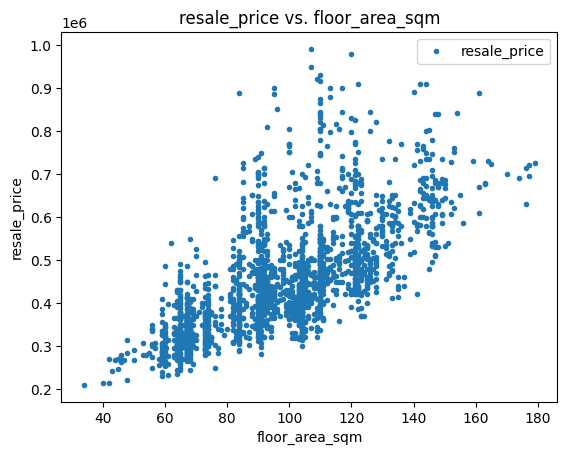

In [5]:
dataset.plot(x='floor_area_sqm', y='resale_price', style='.')
plt.title('resale_price vs. floor_area_sqm')
plt.ylabel('resale_price')
plt.xlabel('floor_area_sqm')
plt.show()

<Figure size 1500x1000 with 0 Axes>

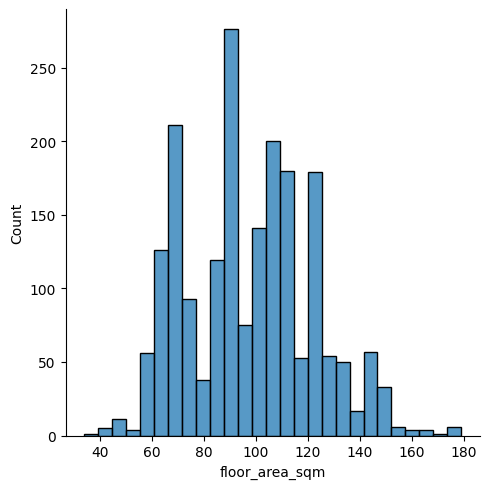

In [6]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.displot(dataset['floor_area_sqm'])

In [7]:
X = dataset['floor_area_sqm'].values.reshape(-1,1)
y = dataset['resale_price'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train) #training the algorithm
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[99200.12048549]
[[3633.15226223]]


In [8]:
y_pred = regressor.predict(X_test)

In [9]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,530000.0,553344.153264
1,280000.0,331721.865268
2,350000.0,397118.605988
3,430000.0,335355.017531
4,363000.0,364420.235628
...,...,...
395,390000.0,477047.955758
396,472000.0,538811.544216
397,440000.0,498846.869331
398,425000.0,542444.696478


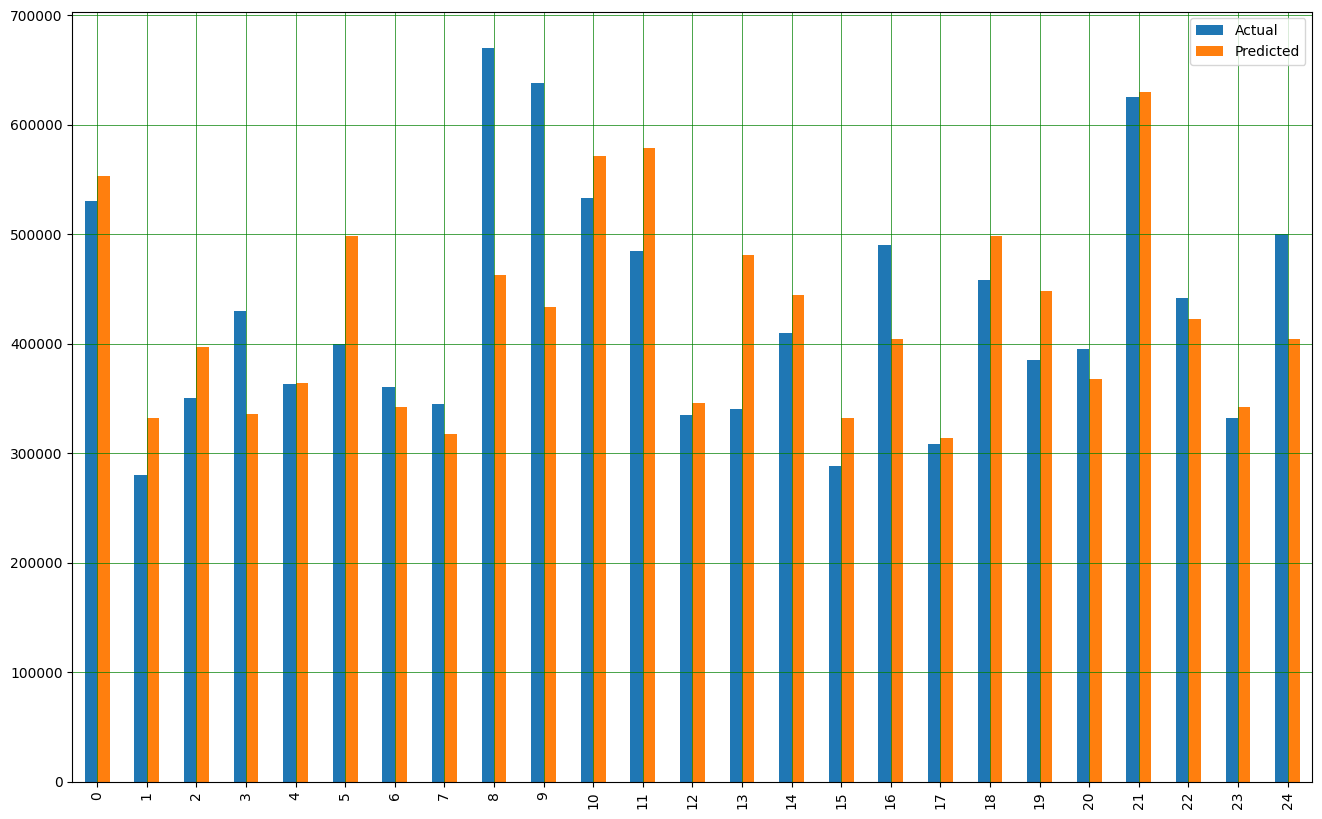

In [10]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

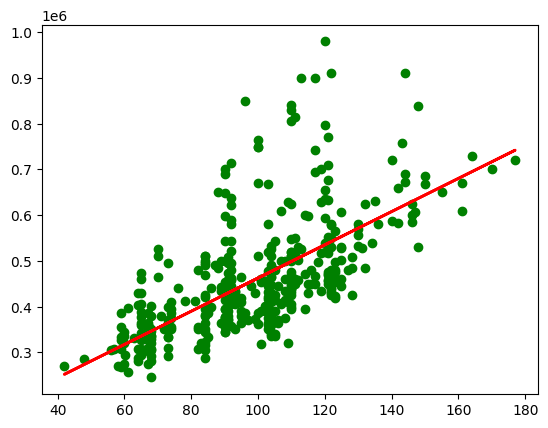

In [11]:
plt.scatter(X_test, y_test,  color='green')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [12]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 70357.60138898242
Mean Squared Error: 9993072292.213175
Root Mean Squared Error: 99965.35545984506


In [13]:
area = 125
aa= np.array([area])
aa = np.reshape(aa,[1,1])
price = regressor.predict(aa)
print('\narea=',area,'\tprice=',price)


area= 125 	price= [[553344.15326444]]


### Now it's The Practice Time...
1. Use celebs2.csv dataset
2. try to guess celebrities' height based on their weight.
3. This way height= F(weight)
4. Try linear regression, just keep the 1st and 2nd variables, height and weight
5. Use 80% of data samples for training and 20% for testing
6. Report the MAE and MSE

[-122.14104637]
[[1.09732406]]


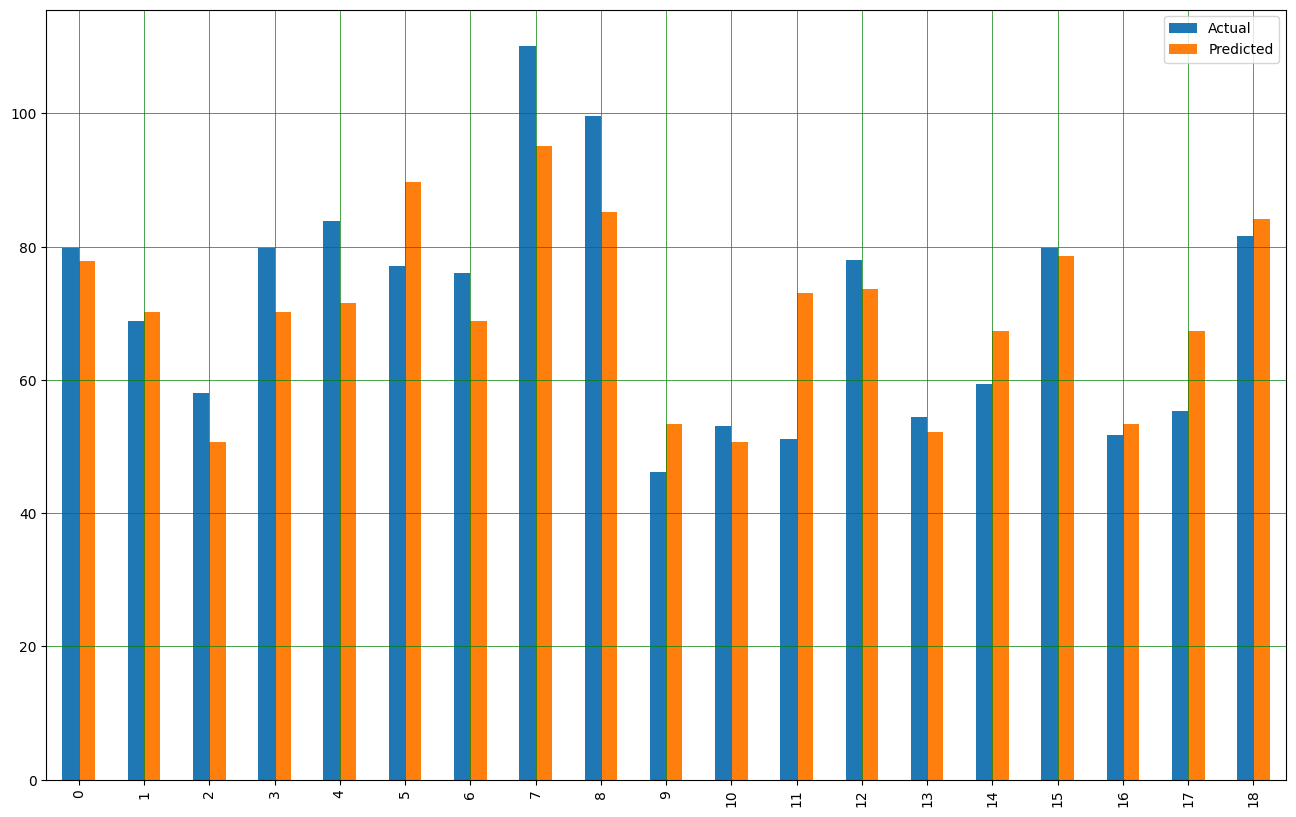

Mean Absolute Error: 7.643367928082847
Mean Squared Error: 90.59041756238787
Root Mean Squared Error: 9.51789985040754


In [45]:
df1 = pd.read_csv('sample_data/celebs2.csv',  names=['height', 'weight', 'sex'])
df1.describe()
X = df1['height'].values.reshape(-1,1)
y = df1['weight'].values.reshape(-1,1)
# print(X)
# print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
regressor.fit(X_train, y_train)
print(regressor.intercept_)
print(regressor.coef_)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
output = df.head(25)
output.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))